# Does age have any correlation with overall trust in legal system? Exploring for the following countries: United Kingdom, Finland, Hungary and Switzerland. 

# United Kingdom

In [104]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('UK_csv.csv')

In [105]:
# Create the "age" dataframe
age = df[['age', 'agea']]
age = age[age['age'] != 999]

In [106]:
# Create the "satisfied_with_gov" dataframe
satisfied_with_gov = df[['stfgov']]
satisfied_with_gov = satisfied_with_gov[~satisfied_with_gov['stfgov'].isin([77, 88, 99])]

In [107]:
# Create the "trust_legal_system" dataframe
trust_legal_system = df[['trstlgl']]
trust_legal_system = trust_legal_system[~trust_legal_system['trstlgl'].isin([77, 88, 99])]

In [108]:
# Create the "trust_politicians" dataframe
trust_politicians = df[['trstplt']]
trust_politicians = trust_politicians[~trust_politicians['trstplt'].isin([77, 88, 99])]

In [109]:
# Create the "trust_pol_parties" dataframe
trust_pol_parties = df[['trstprt']]
trust_pol_parties = trust_pol_parties[~trust_pol_parties['trstprt'].isin([77, 88, 99])]

## Satisfaction with National Government 

### Correlation between Age and Satisfaction with National Government

In [110]:
print(len(age['age']))
print(len(satisfied_with_gov['stfgov']))

20972
20568


In [111]:
# Define the desired number of entries
desired_entries = 20568

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

20568


Correlation between Age and Satisfaction with National Government: -0.08463356120641725


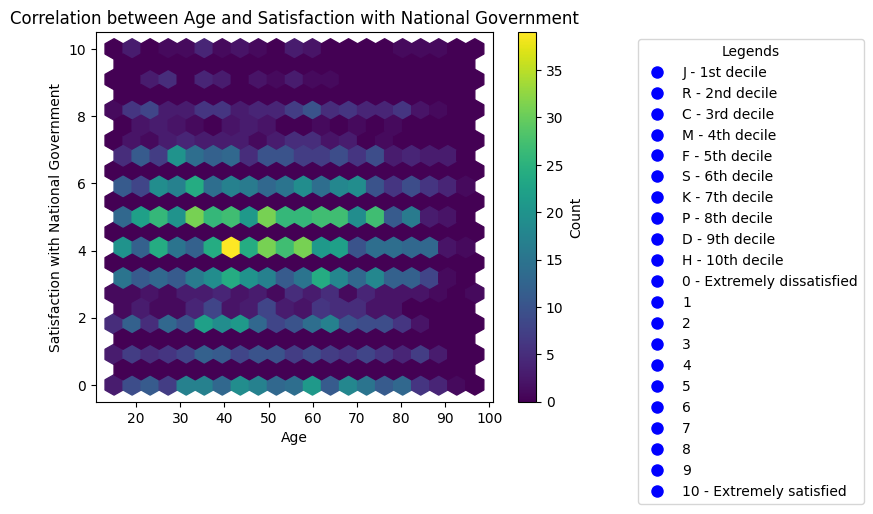

In [112]:
# Calculate correlation between age and satisfaction with national government
correlation = resampled_age['age'].corr(satisfied_with_gov['stfgov'])
print(f"Correlation between Age and Satisfaction with National Government: {correlation}")

# Create a hexbin plot with age and satisfaction with national government
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], satisfied_with_gov['stfgov'], gridsize=20, cmap='viridis')

# Define the decile labels for age levels
age_labels = {
    1: 'J - 1st decile',
    2: 'R - 2nd decile',
    3: 'C - 3rd decile',
    4: 'M - 4th decile',
    5: 'F - 5th decile',
    6: 'S - 6th decile',
    7: 'K - 7th decile',
    8: 'P - 8th decile',
    9: 'D - 9th decile',
    10: 'H - 10th decile'
}

# Define the satisfaction labels for the y-axis scale
satisfaction_labels = {
    0: '0 - Extremely dissatisfied',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Extremely satisfied'
}

# Create custom legends for the decile labels and satisfaction labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
satisfaction_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in satisfaction_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Satisfaction with National Government')
ax.set_xlabel('Age')
ax.set_ylabel('Satisfaction with National Government')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add combined legend for both age and satisfaction labels
legend_handles = age_legend_elements + satisfaction_legend_elements
legend_labels = list(age_labels.values()) + list(satisfaction_labels.values())
ax.legend(handles=legend_handles, labels=legend_labels, title='Legends', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/UK_1.png")
            
plt.show()

## Trust in Legal System

### Correlation between Age and Trust in Legal System

In [113]:
print(len(age['age']))
print(len(trust_legal_system['trstlgl']))

20972
20585


In [114]:
# Define the desired number of entries
desired_entries = 20585

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


20585


Correlation between Trust in Legal System and Age: -0.015366934603177543


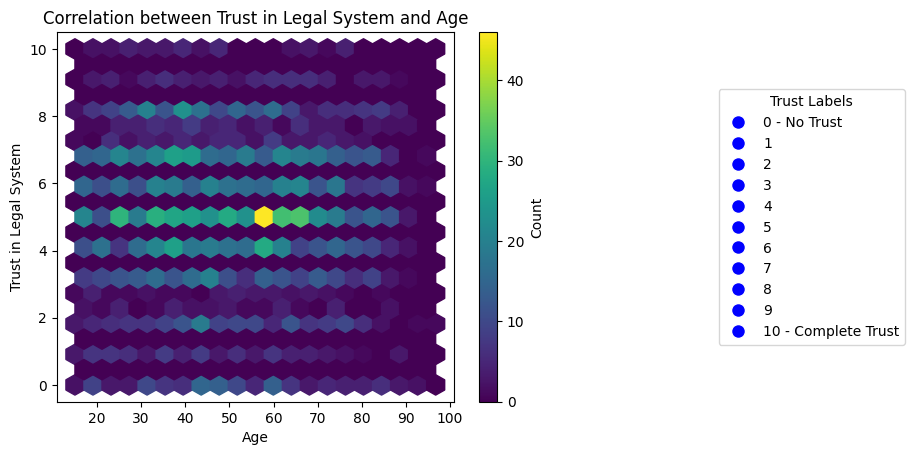

In [115]:
# Calculate correlation between trust in legal system and age
correlation = trust_legal_system['trstlgl'].corr(resampled_age['age'])
print(f"Correlation between Trust in Legal System and Age: {correlation}")

# Create a hexbin plot with trust in legal system and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_legal_system['trstlgl'], gridsize=20, cmap='viridis')

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Legal System and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Legal System')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/UK_2.png")
            
plt.show()


## Trust in Politicians 

### Correlation between Age and Trust in Politicians

In [116]:
print(len(trust_politicians['trstplt']))
print(len(age['age']))

20672
20972


In [117]:
# Define the desired number of entries
desired_entries = 20672

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

20672


Correlation between Trust in Politicians and Age: -0.03532461124183182


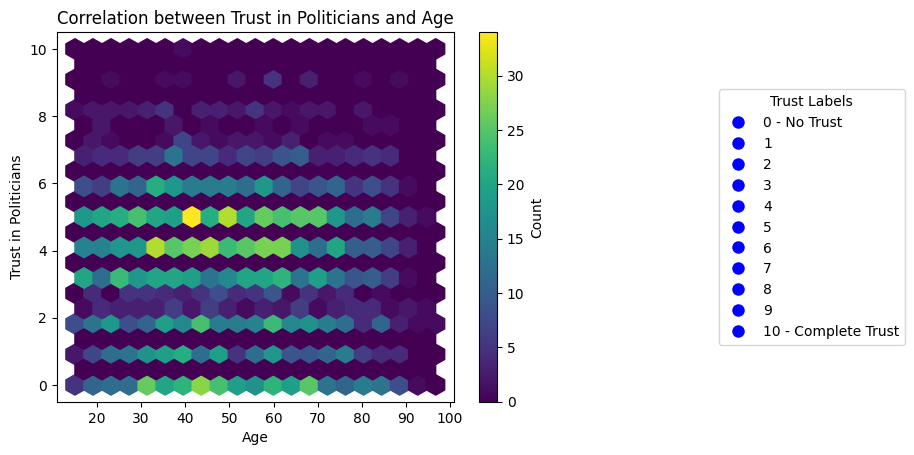

In [118]:
# Calculate correlation between trust in politicians and age
correlation = trust_politicians['trstplt'].corr(resampled_age['age'])
print(f"Correlation between Trust in Politicians and Age: {correlation}")

# Create a hexbin plot with trust in politicians and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_politicians['trstplt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Politicians and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Politicians')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/UK_3.png")
            
plt.show()

## Trust in Political Parties 

### Correlation between Age and Trust in Political Parties

In [119]:
print(len(trust_pol_parties['trstprt']))
print(len(age['age']))

20595
20972


In [120]:
# Define the desired number of entries
desired_entries = 20595

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


20595


Correlation between Age and Trust in Political Parties: -0.02990057683551025


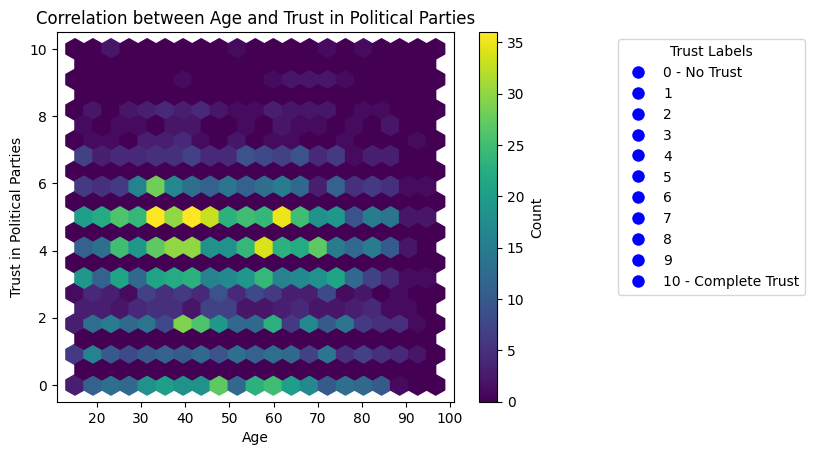

In [121]:
# Calculate correlation between age and trust in political parties
correlation = resampled_age['age'].corr(trust_pol_parties['trstprt'])
print(f"Correlation between Age and Trust in Political Parties: {correlation}")

# Create a hexbin plot with age and trust in political parties
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_pol_parties['trstprt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the age and trust labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Trust in Political Parties')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Political Parties')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for age and trust labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.5), loc='center left')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/UK_4.png")
            
plt.show()

# Finland 

In [183]:
# Load the data from the CSV file
df = pd.read_csv('Finland_csv.csv')

In [184]:
# Create the "age" dataframe
age = df[['age', 'agea']]
age = age[age['age'] != 999]

In [185]:
# Create the "satisfied_with_gov" dataframe
satisfied_with_gov = df[['stfgov']]
satisfied_with_gov = satisfied_with_gov[~satisfied_with_gov['stfgov'].isin([77, 88, 99])]

In [186]:
# Create the "trust_legal_system" dataframe
trust_legal_system = df[['trstlgl']]
trust_legal_system = trust_legal_system[~trust_legal_system['trstlgl'].isin([77, 88, 99])]

In [187]:
# Create the "trust_politicians" dataframe
trust_politicians = df[['trstplt']]
trust_politicians = trust_politicians[~trust_politicians['trstplt'].isin([77, 88, 99])]

In [188]:
# Create the "trust_pol_parties" dataframe
trust_pol_parties = df[['trstprt']]
trust_pol_parties = trust_pol_parties[~trust_pol_parties['trstprt'].isin([77, 88, 99])]

## Satisfaction with National Government 

### Correlation between Age and Satisfaction with National Government

In [189]:
print(len(age['age']))
print(len(satisfied_with_gov['stfgov']))

19532
19219


In [190]:
# Define the desired number of entries
desired_entries = 19219

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

19219


Correlation between Age and Satisfaction with National Government: -0.04860052420539297


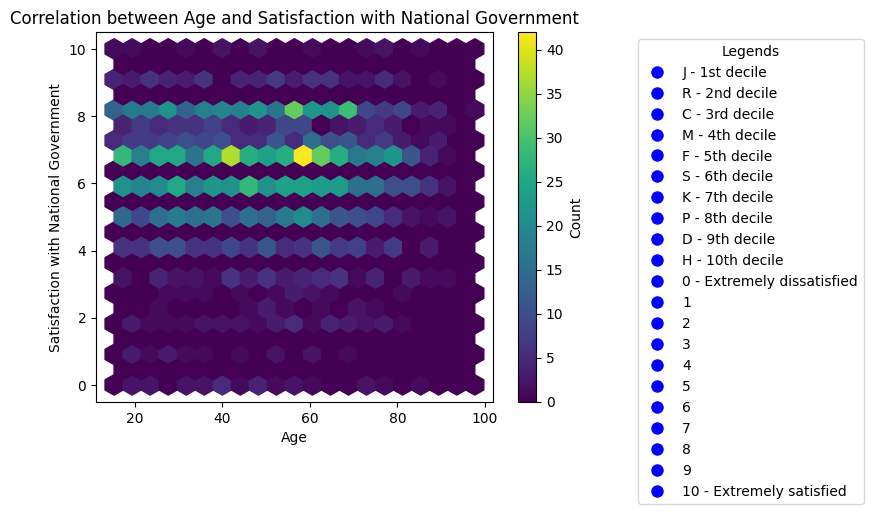

In [191]:
# Calculate correlation between age and satisfaction with national government
correlation = resampled_age['age'].corr(satisfied_with_gov['stfgov'])
print(f"Correlation between Age and Satisfaction with National Government: {correlation}")

# Create a hexbin plot with age and satisfaction with national government
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], satisfied_with_gov['stfgov'], gridsize=20, cmap='viridis')

# Define the decile labels for age levels
age_labels = {
    1: 'J - 1st decile',
    2: 'R - 2nd decile',
    3: 'C - 3rd decile',
    4: 'M - 4th decile',
    5: 'F - 5th decile',
    6: 'S - 6th decile',
    7: 'K - 7th decile',
    8: 'P - 8th decile',
    9: 'D - 9th decile',
    10: 'H - 10th decile'
}

# Define the satisfaction labels for the y-axis scale
satisfaction_labels = {
    0: '0 - Extremely dissatisfied',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Extremely satisfied'
}

# Create custom legends for the decile labels and satisfaction labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
satisfaction_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in satisfaction_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Satisfaction with National Government')
ax.set_xlabel('Age')
ax.set_ylabel('Satisfaction with National Government')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add combined legend for both age and satisfaction labels
legend_handles = age_legend_elements + satisfaction_legend_elements
legend_labels = list(age_labels.values()) + list(satisfaction_labels.values())
ax.legend(handles=legend_handles, labels=legend_labels, title='Legends', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/FI_1.png")
            
plt.show()

## Trust in Legal System

### Correlation between Age and Trust in Legal System

In [192]:
print(len(age['age']))
print(len(trust_legal_system['trstlgl']))

19532
19368


In [193]:
# Define the desired number of entries
desired_entries = 19368

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


19368


Correlation between Trust in Legal System and Age: -0.1409427369654289


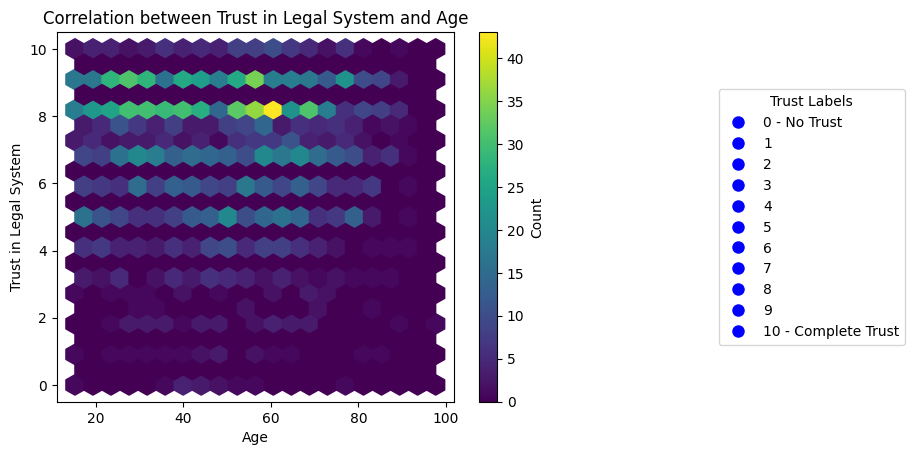

In [194]:
# Calculate correlation between trust in legal system and age
correlation = trust_legal_system['trstlgl'].corr(resampled_age['age'])
print(f"Correlation between Trust in Legal System and Age: {correlation}")

# Create a hexbin plot with trust in legal system and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_legal_system['trstlgl'], gridsize=20, cmap='viridis')

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Legal System and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Legal System')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/FI_2.png")
            
plt.show()


## Trust in Politicians 

### Correlation between Age and Trust in Politicians

In [195]:
print(len(trust_politicians['trstplt']))
print(len(age['age']))

19383
19532


In [196]:
# Define the desired number of entries
desired_entries = 19383

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

19383


Correlation between Trust in Politicians and Age: -0.10595596814631067


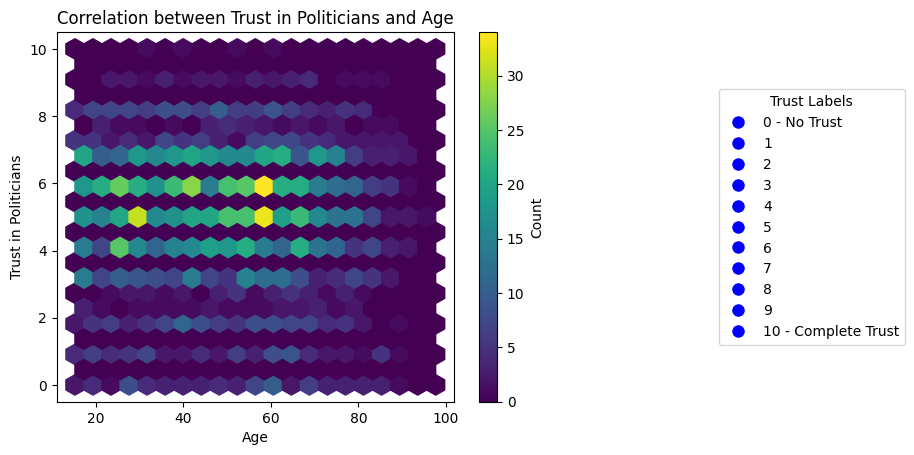

In [197]:
# Calculate correlation between trust in politicians and age
correlation = trust_politicians['trstplt'].corr(resampled_age['age'])
print(f"Correlation between Trust in Politicians and Age: {correlation}")

# Create a hexbin plot with trust in politicians and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_politicians['trstplt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Politicians and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Politicians')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/FI_3.png")
            
plt.show()

## Trust in Political Parties 

### Correlation between Age and Trust in Political Parties

In [198]:
print(len(trust_pol_parties['trstprt']))
print(len(age['age']))

19319
19532


In [199]:
# Define the desired number of entries
desired_entries = 19319

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


19319


Correlation between Age and Trust in Political Parties: -0.10875025407821134


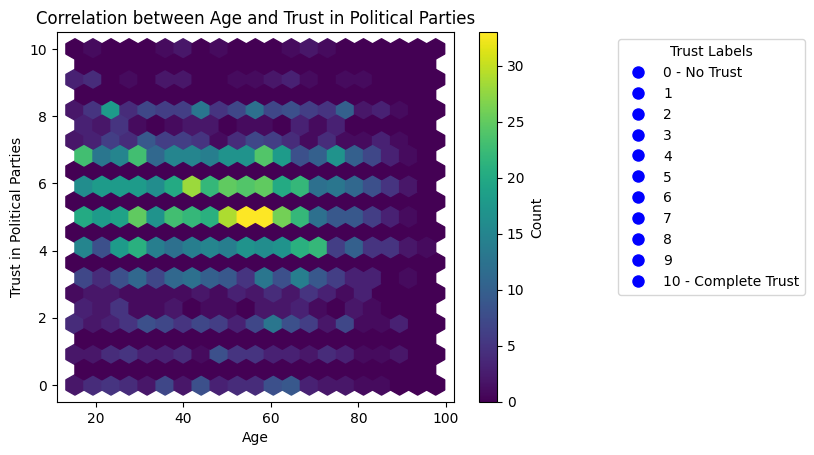

In [139]:
# Calculate correlation between age and trust in political parties
correlation = resampled_age['age'].corr(trust_pol_parties['trstprt'])
print(f"Correlation between Age and Trust in Political Parties: {correlation}")

# Create a hexbin plot with age and trust in political parties
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_pol_parties['trstprt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the age and trust labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Trust in Political Parties')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Political Parties')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for age and trust labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.5), loc='center left')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/FI_4.png")
            
plt.show()

# Hungary 

In [140]:
# Load the data from the CSV file
df = pd.read_csv('Hungary_csv.csv')

In [141]:
# Create the "age" dataframe
age = df[['age', 'agea']]
age = age[age['age'] != 999]

In [142]:
# Create the "satisfied_with_gov" dataframe
satisfied_with_gov = df[['stfgov']]
satisfied_with_gov = satisfied_with_gov[~satisfied_with_gov['stfgov'].isin([77, 88, 99])]

In [143]:
# Create the "trust_legal_system" dataframe
trust_legal_system = df[['trstlgl']]
trust_legal_system = trust_legal_system[~trust_legal_system['trstlgl'].isin([77, 88, 99])]

In [144]:
# Create the "trust_politicians" dataframe
trust_politicians = df[['trstplt']]
trust_politicians = trust_politicians[~trust_politicians['trstplt'].isin([77, 88, 99])]

In [145]:
# Create the "trust_pol_parties" dataframe
trust_pol_parties = df[['trstprt']]
trust_pol_parties = trust_pol_parties[~trust_pol_parties['trstprt'].isin([77, 88, 99])]

## Satisfaction with National Government 

### Correlation between Age and Satisfaction with National Government

In [146]:
print(len(age['age']))
print(len(satisfied_with_gov['stfgov']))

16627
15722


In [147]:
# Define the desired number of entries
desired_entries = 15722

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

15722


Correlation between Age and Satisfaction with National Government: 0.11414648022593007


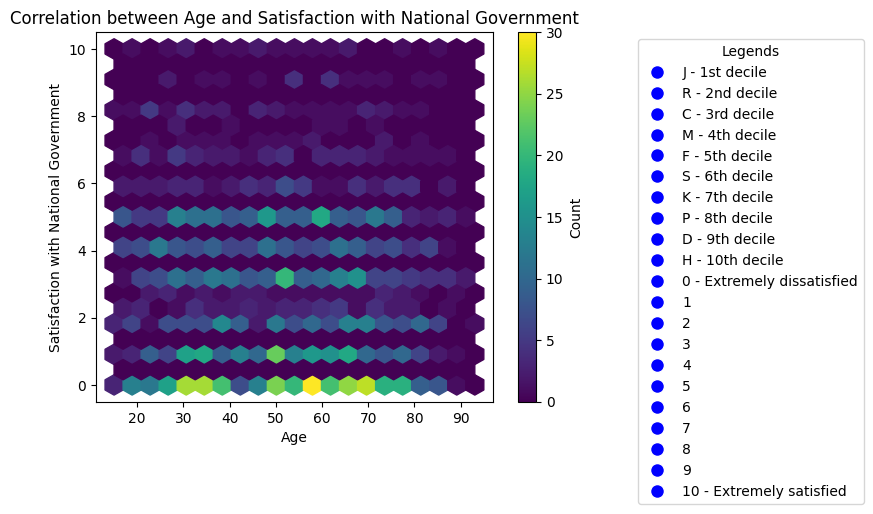

In [148]:
# Calculate correlation between age and satisfaction with national government
correlation = resampled_age['age'].corr(satisfied_with_gov['stfgov'])
print(f"Correlation between Age and Satisfaction with National Government: {correlation}")

# Create a hexbin plot with age and satisfaction with national government
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], satisfied_with_gov['stfgov'], gridsize=20, cmap='viridis')

# Define the decile labels for age levels
age_labels = {
    1: 'J - 1st decile',
    2: 'R - 2nd decile',
    3: 'C - 3rd decile',
    4: 'M - 4th decile',
    5: 'F - 5th decile',
    6: 'S - 6th decile',
    7: 'K - 7th decile',
    8: 'P - 8th decile',
    9: 'D - 9th decile',
    10: 'H - 10th decile'
}

# Define the satisfaction labels for the y-axis scale
satisfaction_labels = {
    0: '0 - Extremely dissatisfied',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Extremely satisfied'
}

# Create custom legends for the decile labels and satisfaction labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
satisfaction_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in satisfaction_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Satisfaction with National Government')
ax.set_xlabel('Age')
ax.set_ylabel('Satisfaction with National Government')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add combined legend for both age and satisfaction labels
legend_handles = age_legend_elements + satisfaction_legend_elements
legend_labels = list(age_labels.values()) + list(satisfaction_labels.values())
ax.legend(handles=legend_handles, labels=legend_labels, title='Legends', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/HU_1.png")
            
plt.show()

## Trust in Legal System

### Correlation between Age and Trust in Legal System

In [149]:
print(len(age['age']))
print(len(trust_legal_system['trstlgl']))

16627
16062


In [150]:
# Define the desired number of entries
desired_entries = 16062

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


16062


Correlation between Trust in Legal System and Age: 0.003665728229151535


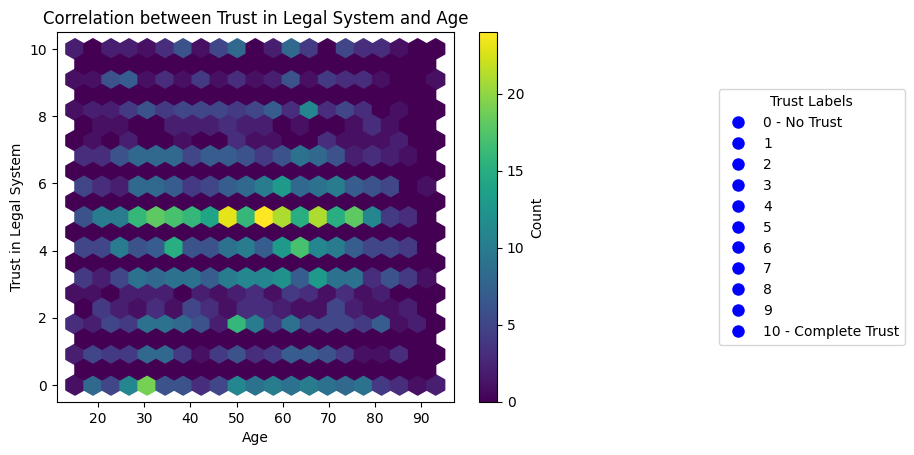

In [151]:
# Calculate correlation between trust in legal system and age
correlation = trust_legal_system['trstlgl'].corr(resampled_age['age'])
print(f"Correlation between Trust in Legal System and Age: {correlation}")

# Create a hexbin plot with trust in legal system and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_legal_system['trstlgl'], gridsize=20, cmap='viridis')

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Legal System and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Legal System')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/HU_2.png")
            
plt.show()


## Trust in Politicians 

### Correlation between Age and Trust in Politicians

In [152]:
print(len(trust_politicians['trstplt']))
print(len(age['age']))

16193
16627


In [153]:
# Define the desired number of entries
desired_entries = 16193

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

16193


Correlation between Trust in Politicians and Age: 0.08083914657573027


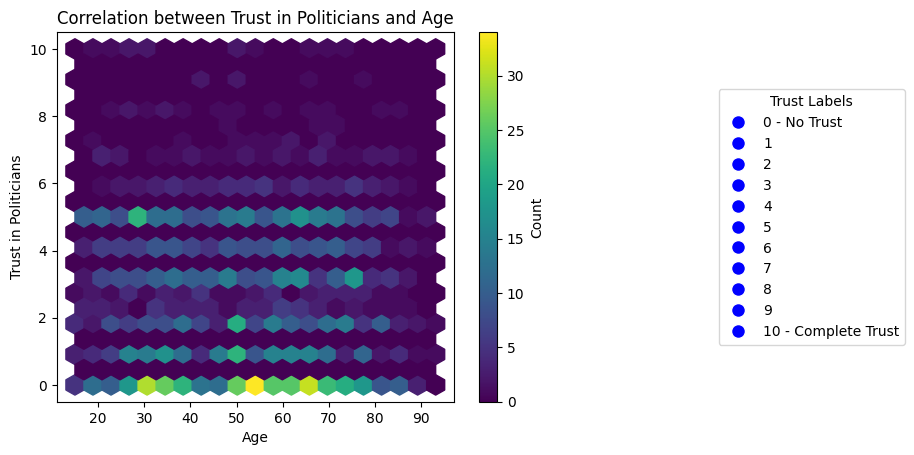

In [154]:
# Calculate correlation between trust in politicians and age
correlation = trust_politicians['trstplt'].corr(resampled_age['age'])
print(f"Correlation between Trust in Politicians and Age: {correlation}")

# Create a hexbin plot with trust in politicians and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_politicians['trstplt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Politicians and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Politicians')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/HU_3.png")
            
plt.show()

## Trust in Political Parties 

### Correlation between Age and Trust in Political Parties

In [155]:
print(len(trust_pol_parties['trstprt']))
print(len(age['age']))

16181
16627


In [156]:
# Define the desired number of entries
desired_entries = 16181

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


16181


Correlation between Age and Trust in Political Parties: 0.07052011972690846


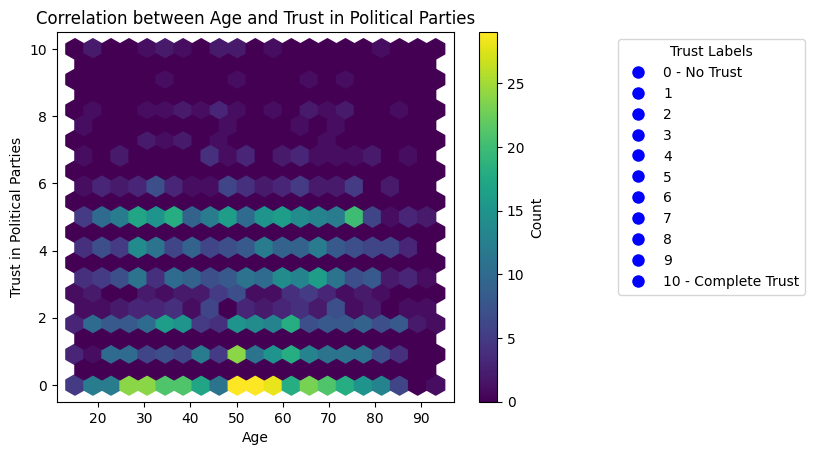

In [157]:
# Calculate correlation between age and trust in political parties
correlation = resampled_age['age'].corr(trust_pol_parties['trstprt'])
print(f"Correlation between Age and Trust in Political Parties: {correlation}")

# Create a hexbin plot with age and trust in political parties
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_pol_parties['trstprt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the age and trust labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Trust in Political Parties')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Political Parties')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for age and trust labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.5), loc='center left')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/HU_4.png")
            
plt.show()

# Switzerland

In [158]:
# Load the data from the CSV file
df = pd.read_csv('Switz_csv.csv')

In [159]:
# Create the "age" dataframe
age = df[['age', 'agea']]
age = age[age['age'] != 999]

In [160]:
# Create the "satisfied_with_gov" dataframe
satisfied_with_gov = df[['stfgov']]
satisfied_with_gov = satisfied_with_gov[~satisfied_with_gov['stfgov'].isin([77, 88, 99])]

In [161]:
# Create the "trust_legal_system" dataframe
trust_legal_system = df[['trstlgl']]
trust_legal_system = trust_legal_system[~trust_legal_system['trstlgl'].isin([77, 88, 99])]

In [162]:
# Create the "trust_politicians" dataframe
trust_politicians = df[['trstplt']]
trust_politicians = trust_politicians[~trust_politicians['trstplt'].isin([77, 88, 99])]

In [163]:
# Create the "trust_pol_parties" dataframe
trust_pol_parties = df[['trstprt']]
trust_pol_parties = trust_pol_parties[~trust_pol_parties['trstprt'].isin([77, 88, 99])]

## Satisfaction with National Government 

### Correlation between Age and Satisfaction with National Government

In [164]:
print(len(age['age']))
print(len(satisfied_with_gov['stfgov']))

16924
16334


In [165]:
# Define the desired number of entries
desired_entries = 16334

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

16334


Correlation between Age and Satisfaction with National Government: -0.033111569714108106


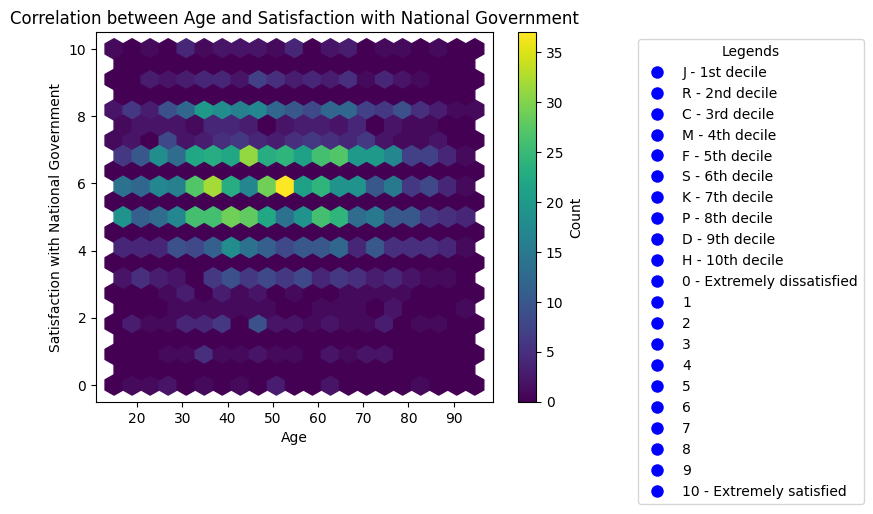

In [166]:
# Calculate correlation between age and satisfaction with national government
correlation = resampled_age['age'].corr(satisfied_with_gov['stfgov'])
print(f"Correlation between Age and Satisfaction with National Government: {correlation}")

# Create a hexbin plot with age and satisfaction with national government
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], satisfied_with_gov['stfgov'], gridsize=20, cmap='viridis')

# Define the decile labels for age levels
age_labels = {
    1: 'J - 1st decile',
    2: 'R - 2nd decile',
    3: 'C - 3rd decile',
    4: 'M - 4th decile',
    5: 'F - 5th decile',
    6: 'S - 6th decile',
    7: 'K - 7th decile',
    8: 'P - 8th decile',
    9: 'D - 9th decile',
    10: 'H - 10th decile'
}

# Define the satisfaction labels for the y-axis scale
satisfaction_labels = {
    0: '0 - Extremely dissatisfied',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Extremely satisfied'
}

# Create custom legends for the decile labels and satisfaction labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
satisfaction_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in satisfaction_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Satisfaction with National Government')
ax.set_xlabel('Age')
ax.set_ylabel('Satisfaction with National Government')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add combined legend for both age and satisfaction labels
legend_handles = age_legend_elements + satisfaction_legend_elements
legend_labels = list(age_labels.values()) + list(satisfaction_labels.values())
ax.legend(handles=legend_handles, labels=legend_labels, title='Legends', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/CH_1.png")
            
plt.show()

## Trust in Legal System

### Correlation between Age and Trust in Legal System

In [167]:
print(len(age['age']))
print(len(trust_legal_system['trstlgl']))

16924
16495


In [168]:
# Define the desired number of entries
desired_entries = 16495

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


16495


Correlation between Trust in Legal System and Age: -0.09154053708744561


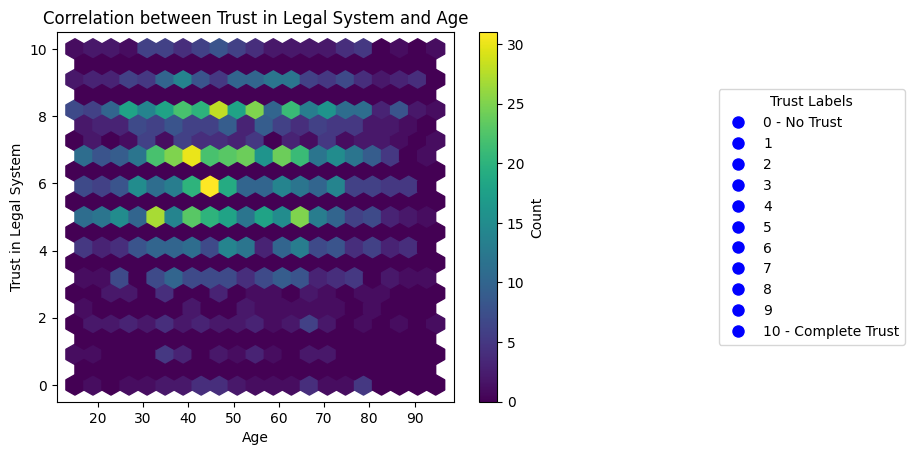

In [169]:
# Calculate correlation between trust in legal system and age
correlation = trust_legal_system['trstlgl'].corr(resampled_age['age'])
print(f"Correlation between Trust in Legal System and Age: {correlation}")

# Create a hexbin plot with trust in legal system and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_legal_system['trstlgl'], gridsize=20, cmap='viridis')

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Legal System and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Legal System')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/CH_2.png")
            
plt.show()


## Trust in Politicians 

### Correlation between Age and Trust in Politicians

In [170]:
print(len(trust_politicians['trstplt']))
print(len(age['age']))

16412
16924


In [171]:
# Define the desired number of entries
desired_entries = 16412

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))

16412


Correlation between Trust in Politicians and Age: 0.027073684026302537


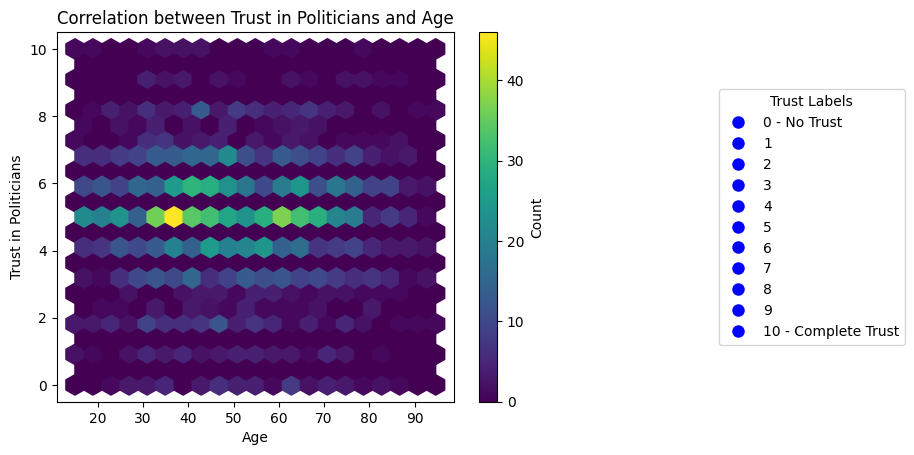

In [172]:
# Calculate correlation between trust in politicians and age
correlation = trust_politicians['trstplt'].corr(resampled_age['age'])
print(f"Correlation between Trust in Politicians and Age: {correlation}")

# Create a hexbin plot with trust in politicians and age
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_politicians['trstplt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the trust and age labels
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Trust in Politicians and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Politicians')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for trust and age labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 0.5), loc='center left')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/CH_3.png")
            
plt.show()

## Trust in Political Parties

### Correlation between Age and Trust in Political Parties

In [173]:
print(len(trust_pol_parties['trstprt']))
print(len(age['age']))

16195
16924


In [174]:
# Define the desired number of entries
desired_entries = 16195

# Calculate the ratio for resampling
resample_ratio = len(age) / desired_entries

# Generate evenly spaced indices for resampling
resampled_indices = np.linspace(0, len(age)-1, num=desired_entries, dtype=int)

# Resample the DataFrame using the calculated indices
resampled_age = age.iloc[resampled_indices]

# Check the length of the resampled DataFrame
print(len(resampled_age))


16195


Correlation between Age and Trust in Political Parties: -0.05348741348326957


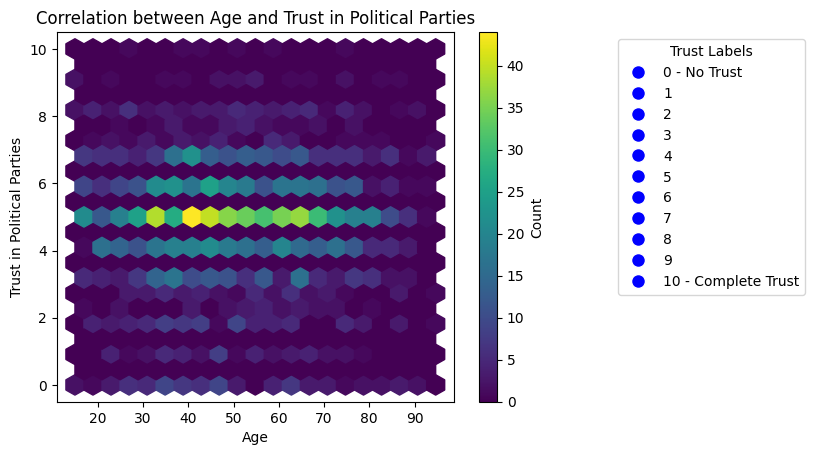

In [175]:
# Calculate correlation between age and trust in political parties
correlation = resampled_age['age'].corr(trust_pol_parties['trstprt'])
print(f"Correlation between Age and Trust in Political Parties: {correlation}")

# Create a hexbin plot with age and trust in political parties
fig, ax = plt.subplots()
hb = ax.hexbin(resampled_age['age'], trust_pol_parties['trstprt'], gridsize=20, cmap='viridis')

# Define the age labels for the x-axis scale
age_labels = {
    1: 'Young',
    2: 'Middle-aged',
    3: 'Elderly'
}

# Define the trust labels for the y-axis scale
trust_labels = {
    0: '0 - No Trust',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Complete Trust'
}

# Create custom legends for the age and trust labels
age_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in age_labels.items()]
trust_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=label) for key, label in trust_labels.items()]

# Add title and labels to the plot
ax.set_title('Correlation between Age and Trust in Political Parties')
ax.set_xlabel('Age')
ax.set_ylabel('Trust in Political Parties')

# Add colorbar to show the count of points in each hexagon
cb = plt.colorbar(hb, ax=ax, label='Count')

# Add legends for age and trust labels
ax.legend(handles=age_legend_elements, title='Age Labels', bbox_to_anchor=(1.65, 1.5), loc='center left')
ax.legend(handles=trust_legend_elements, title='Trust Labels', bbox_to_anchor=(1.65, 1.0), loc='upper center')

# Save the hexbin plot as a PNG in the "Images" folder
plt.savefig("images/CH_4.png")
            
plt.show()

## In summary and contrary to belief, there were no strong correlations between age of the respondent and their overall trust in the government and/or legal system. This may be due to the fact that the government in Finland, Hungary and United Kingdom operates under a single authority. Although, Switzerland has a very democratic approach and still there were no correlations of note. 
